In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

import itertools
colors = itertools.cycle(('r', 'y', 'b', 'g', 'c'))

In [2]:
def get_run(users, emails):
    filename = '{}user{}emails.txt'.format(users, emails)
    run = {}
    with open(filename) as f:
        for line in f:
            key, value = line.split()
            value = float(value)
            run.setdefault(key, []).append(value)
    return run

In [3]:
metrics = []
for users in [1, 5, 10, 25, 50]:
    metrics.append((users, get_run(1, users)))

In [4]:
for key, value in metrics:
    value['sync_evolution'] = value['initial-sync'] + value['sync-leap-mail-recurrent']

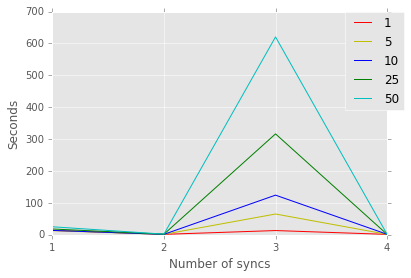

In [5]:
plt.figure()
plt.ylabel('Seconds')
plt.xlabel('Number of syncs')

for key, value in metrics:
    plt.plot([1,2,3,4], value['sync_evolution'], label=key, color=colors.next())

plt.xticks((1, 2, 3, 4,))
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.savefig('syncs-1.png', bbox_inches='tight', dpi=200)

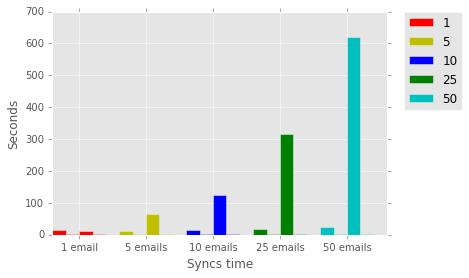

In [6]:
plt.figure()
plt.ylabel('Seconds')
plt.xlabel('Syncs time')

indices = np.arange(len(metrics[0][1]['sync_evolution']))
width = 1

for key, value in metrics:
    plt.bar(indices, value['sync_evolution'], width=width, label=key, color=colors.next())
    indices = indices + len(indices) + width

plt.xticks((2, 7, 12, 17, 22), ('1 email', '5 emails', '10 emails', '25 emails', '50 emails'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.savefig('syncs-2.png', bbox_inches='tight', dpi=200)

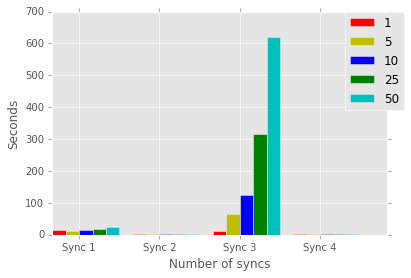

In [7]:
plt.figure()
plt.ylabel('Seconds')
plt.xlabel('Number of syncs')

indices = np.array([0, 6, 12, 18])
width = 1

for key, value in metrics:
    plt.bar(indices, value['sync_evolution'], width=width, label=key, color=colors.next())
    indices = indices + width

plt.xticks((2, 8, 14, 20), ('Sync 1', 'Sync 2', 'Sync 3', 'Sync 4'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.savefig('syncs-3.png', bbox_inches='tight', dpi=200)